Science and engineering have seen amazing progress over the last few centuries. We are now able to launch a spacecraft from Earth and predict it will arrive on Mars at a certain time and location. However, it looks like not everything is as easy to predict as the trajectory of a spacecraft.

Take tossing a coin, for instance — we're not able to predict with certainty whether the coin is going to land on heads or tails. And that's because a coin toss is a very complex phenomenon. The outcome depends on mutiple factors — 
* the strength and the angle of the toss, 
* the friction of the coin with air, 
* the landing angle, 
* the surface the coin lands on, etc.

Although we can't tell beforehand the outcome of a coin toss, but we're able to at least estimate the probability (the chances) of a coin landing on heads or tails. This may sound like a limitation, and in a way it is, but estimating probabilities is an extremely powerful technique that can enable us to build non-trivial applications, including:

* Image recognition systems (used for self-driving cars, medical diagnosis, etc.)
* Spam filters for inboxes
* Statistical hypothesis tests

Whenever we can't predict outcomes with certainty, we're dealing with a **random experiment**. The toss of a coin is a random experiment, just like drawing lottery numbers or rolling a die. Random experiment is any process for which we can't predict outcomes with certainty.

Although we can't predict the outcome of a random experiment, we can at least estimate the probability (the chances) associated with its outcomes. A coin toss has two possible outcomes, and we can estimate the probability associated with the coin landing on heads or tails.

To estimate the probability, we can take the following steps:

* Toss the coin many times (thus repeating the random experiment).
* Count the number of times the coin landed on heads.
* Divide the number of heads by the total number of times we tossed the coin.

Dividing the number of heads by the total number of times we tossed the coin gives us the probability of a coin landing heads up. Let's say we tossed a coin 100 times and got heads 56 times. We find the probability of a coin landing heads up by dividing the number of heads (56) by the total number of times we tossed the coin (100). This is `56/100 = 0.56`, so the probability of a coin landing heads up is `0.56`.

`probablity(Coin landed Up) = 0.56`

We read the mathematical expression above as "the probability of the event coin lands heads up is `0.56`." For simplicity, the notation is often compressed, and **Probability** becomes **P**, while "coin lands heads up" becomes simply **heads** or **H**:

`P(H) = 0.56`

Generally, for any event **E** (like a coin landing heads up), we can find its probability by using the following formula:

`P(E) = number of time event E happend/number of times we repeated experiment`

When we calculate the probability of an event by performing an experiment one or more times, we calculate the **experimental — or empirical probability** — of the event.

In [1]:
# We rolled a regular six-sided die 200 times and:
# We got a six 28 times.

p_six = 28/200
p_six

0.14

In [2]:
# We rolled a regular six-sided die 200 times and
# We got an odd number (a 1, a 3, or a 5) 102 times

p_odd = 102/200
p_odd

0.51

We divided the number of heads by the number of times we tossed the coin to find the empirical probability of **H** (coin lands heads up) however, that `0.56` represents the proportion of heads from the total number of tosses. We can convert proportions to percentages

`0.56*100 = 56%`

This tells us that the empirical probability of an event is nothing but the relative frequency (proportion or percentage) of that event with respect to the total number of times the experiment was performed.

Using percentages gives us a more intuitive understanding of what a probability value really is. For instance,56% tells us that for any coin toss, there's a 56% chance the coin will land heads up. So just before we're about to toss a coin, we may not be able to predict the outcome, but at least we know there's a 56% chance the coin will land heads up.

In [4]:
# We tossed a coin 300 times and got tails 162 times
p_heads_1 = (300-162) / 300
percentage_1 = p_heads_1 * 100
percentage_1

46.0

In [5]:
# we tossed a coin 5,000 times and got tails 2,450 times.

p_heads_2 = (5000-2450) / 5000
percentage_2 = p_heads_2 * 100
percentage_2

51.0

We tossed a coin **300 times**, and found that `p(H) = 46%` Then, we tossed a coin **5,000 times** and found that `p(H) = 51%`. But if different number of tosses give different probability values, then what's the true value of `P(H)`?

To answer this question, we're going to do a **thought experiment** where we assume we already know that the `true probability of P(H) is 50%`. We'll also assume the chances are the same for getting tails, so `P(T) = 50%`.

Using these assumptions, we're going to use Python to simulate a coin toss `10,000` times and watch how `P(H)` evolves as the number of tosses increases. We begin by writing a function named `coin_toss()` that can simulate a single coin toss:

In [60]:
import numpy as np

np.random.seed(1) #  set a random seed to 1 for reproducibility

def coin_toss():
    toss = np.random.randint(0,2) # 2 won't be included
    if toss == 1:
        return "Head"
    else:
        return "Tail"

In [66]:
# Repeat the coin toss 10,000 times, and for each toss we want to save the value of P(H) up to that point.

np.random.seed(1) 

P_H = []
heads = 0
counts = 0
for i in range(1,10001):
    counts += 1
    toss = coin_toss()
    if  toss == "Head":
        heads += 1
        P_H.append(heads/counts)

print(heads)
print(counts)


4994
10000


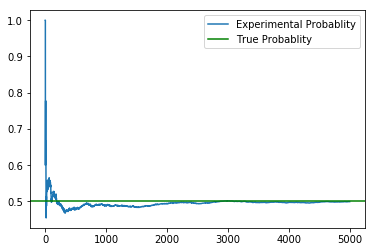

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
probablities = pd.Series(P_H)
probablities.plot(label = "Experimental Probablity")
plt.axhline(0.5, label = "True Probablity", color = "Green")
plt.legend()
plt.show()

Above, we see that for the first 1,000 tosses or so, the value of `P(H)` varies a lot, with a maximum of `1.0` and a minimum of approximately `0.45`. However, as the number of tosses increases, the value of `P(H)` tends to stabilize.

In [83]:
(probablities[-5:]).values

array([0.49939952, 0.49939964, 0.4993498 , 0.49939988, 0.4994    ])

This gives us some insight into our initial question, which was: if different numbers of tosses give different probability values, then what's the true value of `P(H)`? 

The true `P(H)` is given by the relative frequency (expressed as proportion or percentage) of heads as the number of coin tosses increases without bound — the more we repeat the toss, the closer we should be to the true probability.

So far, we learned we need to perform an experiment to estimate probability values. We also said that a probability value estimated by performing an experiment is called **empirical (or experimental) probability**. To find the empirical probability of any event "E" (like a coin landing heads up), we learned to use the formula:

`P(E) = number of time event E happend/number of times we repeated experiment`

However, properly calculating empirical probabilities requires us to perform a random experiment many times, which may not always be feasible in practice. An easier way to estimate probabilities is to start with the assumption that the outcomes of a random experiment have **equal chances of occurring**. This allows us to use the following formula to calculate the probability of an event "E":

`P(E) = 1/total number of possible outcomes`

For instance, the total number of possible outcomes for a coin toss is two: **heads** or **tails**. Let **H** be the event that a coin lands on heads, and **T** the event that a coin lands on tails. We can use the formula above to find `P(H)` and `P(T)`:

$$P(H) = 1/2 = 0.5$$

$$P(T) = 1/2 = 0.5$$

Let's also consider the rolling of a die, where there are six possible outcomes: `1, 2, 3, 4, 5 or 6`. Assuming each outcome has the same chance of occurring, the probability of getting a `2` or a `4` is

$$P(2) = 1/6 = 0.16$$

$$P(4) = 1/6 = 0.16$$

When we calculate the probability of an event under the assumption that the outcomes have equal chances of occurring, we say that we're calculating the **theoretical probability** of an event.

Theoretical probabilities are much easier to calculate, but in practice it doesn't always make sense to assume the outcomes of a random experiment have equal chances of occurring. If we were playing the lottery, it wouldn't be reasonable to assume that the two possible outcomes (we win or we don't) have equal chances.

In [84]:
#  theoretical probability of getting a 5 when rolling a six-sided die.

p_5 = 1/6
p_5

0.16666666666666666

In [1]:
# Tossing a coin twice has four possible outcomes (assume all the outcomes are equally likely):
# Heads on the first toss and heads on the second toss (HH).
# Heads on the first toss and tails on the second (HT).
# Tails on the first toss and heads on the second (TH).
# Tails on the first toss and tails on the second (TT)

# P(HT)
p_ht = (1/2)*(1/2)  # {(H,H)}/{(H,H), (H,T), (T,H), (T,T)} i.e 1/4
# P(TT) 
p_tt = (1/2)*(1/2)

We've repeatedly used the terms **event** and **outcome**, and we need to add a few clarifications.
* An outcome is any result that a random experiment may terminate in. For instance, all the possible outcomes of rolling a six-sided die are `1, 2, 3, 4, 5, and 6`. 
* An event, however, has a richer meaning and can include more than one outcome (or even zero outcomes):

    * The event that we'll get an odd number when we roll a six-sided die — this event includes the outcomes `1, 3, and 5`.
    * The event that we'll get a number less than 5 but greater than 1 when we roll a six-sided die — this event includes the outcomes `2, 3, and 4`.
    * The event that we'll get a number greater than `20` when we roll a six-sided die — this event doesn't include any of the possible outcomes corresponding to rolling a six-sided die.

Although an event can include a single outcome (like the event of getting a 2 when we roll a die), the two concepts still have a different meaning. We always assign probabilities to events, not outcomes, even if the event includes only one outcome.

We learned we can use this formula to compute the theoretical probability of an event:

`P(E) = 1/total number of possible outcomes`

However, we can't use this formula to compute theoretical probabilities for events that include more than one outcome.

To fix this problem, we need to update the formula above to:

`P(E) = number of successful outcomes/total number of possible outcomes`

* The **number of successful outcomes** part represents the number of outcomes included in the event **E**, and
* **total number of possible outcomes** is the number of possible outcomes that the random experiment associated with the event **E** could terminate in.

The event that we'll get an odd number when we roll a six-sided die includes three successful outcomes `(1, 3, and 5)`, and the random experiment of rolling the die includes six possible outcomes `(1, 2, 3, 4, 5, and 6)`. This means:

`P(odd Number) = 3/6 = 0.5`

In [87]:
# We get an even number
p_even = 3/6

# We get an odd number different than 3 
p_odd_no_3 = 2/6

# We get an odd number greater than 5 

p_odd_greater_5 = 0/6

let's say we have a biased six-sided die which has a 6 on three of its sides, and `1, 3, and 5` on the rest of the sides. So, the possible outcomes are `1, 3, 5, 6, 6 and 6`.

In [89]:
p_6 = 3/6
p_3 = 1/6
p_2 = 0/6

If we didn't treat each 6 differently and said it doesn't matter which side a 6 is on, we'd be forced to conclude the only possible outcomes are 1, 3, 5 and 6, which is totally wrong

$$P(3) = 1/4=0.25$$
$$P(6) = 1/4=0.25(wrong)$$

The formula doesn't work anymore because the assumption of equally likely outcomes is violated — in this case, 6 has more chances of occurring than the other outcomes.

The take-home message here is that the formula above works under the assumption that the outcomes have equal chances of occuring. If the assumption is violated, the formula will output wrong probability values.

In [90]:
# In a jar of 100 marbles, 90 marbles are red and 10 are blue

# The probability of randomly selecting a blue marble from the jar

p_blue = 10/100

# The probability of randomly selecting a red marble from the jar
p_red = 90/100